In [22]:
#IMPORT DEPENDENCIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC #used for supervised machine learning
from sklearn.preprocessing import StandardScaler #to standardize dataset
from sklearn.model_selection import train_test_split #to divide data into training and testing sets

In [23]:
#IMPORT DATASET
dataframe = pd.read_csv('../CSV-files/diabetes.csv')
dataframe.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
#WE DON'T WANT THE OUTCOME COLUMN IN DATASET WHILE TRAINING, AS PREDICTIONS ARE TO BE MADE
X = dataframe.drop(columns = 'Outcome', axis = 1) 
Y = dataframe['Outcome'] 

In [26]:
correlation_matrix = X.corr(method = 'kendall').abs()
print(correlation_matrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.091323       0.135440       0.064401   
Glucose                      0.091323  1.000000       0.159961       0.039046   
BloodPressure                0.135440  0.159961       1.000000       0.094868   
SkinThickness                0.064401  0.039046       0.094868       1.000000   
Insulin                      0.096417  0.163645       0.003682       0.420066   
BMI                          0.004183  0.155862       0.205222       0.331532   
DiabetesPedigreeFunction     0.029959  0.061871       0.019448       0.126457   
Age                          0.458272  0.196510       0.246056       0.044754   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.096417  0.004183                  0.029959   
Glucose                   0.163645  0.155862                  0.061871   
BloodPressure             0.003682  0.205222    

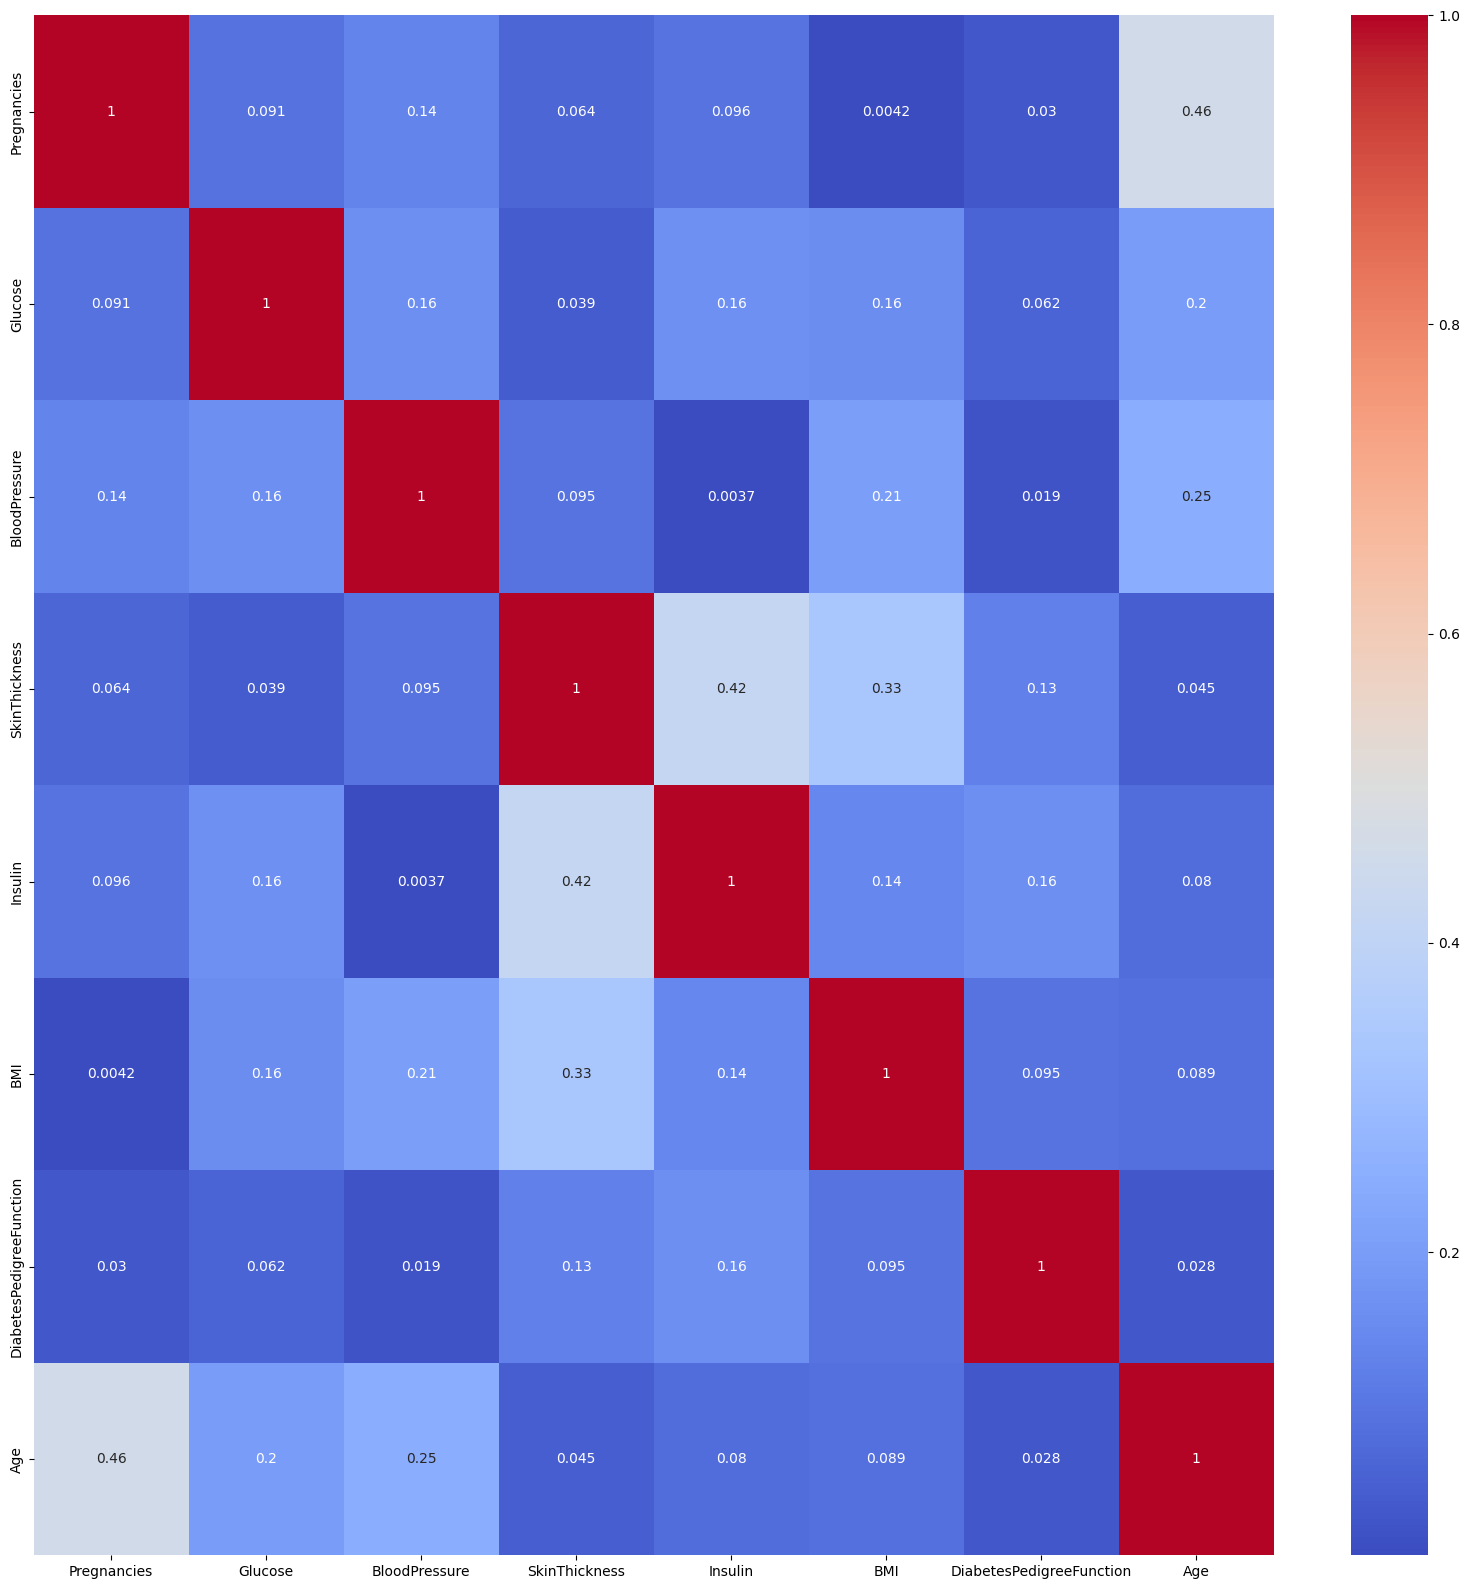

In [27]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [28]:
threshold = 0.9
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > (threshold))]
reduced_data = X.drop(columns=to_drop)
X = reduced_data

In [29]:
print(X.isnull().sum() > 0)

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
dtype: bool


In [30]:
#SINCE EVERY DATAPOINT HAS DIFFERENT FIGURES IT COULD LEAD THE MODEL TO MAKE WRONG PREDICTIONS
#THUS STANDARDIZING THE DATA HELPS IN IMPROVING PERFORMANCE
scaler = StandardScaler() #creating an instance of the function

#next step is to fit all the inconsistent data in the scaler variable and transform it to a common range
X = scaler.fit_transform(X) 
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [31]:
#test-train-split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)
#test_size = .3 represents that 30% of data is saved as test_data
#startify = Y is used to send similar proportion of diabetic and non-diabetic cases to be sent to train and test sets

In [32]:
classifier = SVC(kernel='linear') #using support vector classifier

In [33]:
#training SVM Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [34]:
#Evaluating the predictions
X_train_prediction = classifier.predict(X_train)
train_accuracy = accuracy_score(X_train_prediction, Y_train)

In [35]:
print("Accuracy Score of training: ", train_accuracy*100)

Accuracy Score of training:  78.66449511400651


In [36]:
#Evaluating the predictions
X_test_prediction = classifier.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction, Y_test)

In [37]:
print("Accuracy Score of testing: ", test_accuracy*100)

Accuracy Score of testing:  77.27272727272727


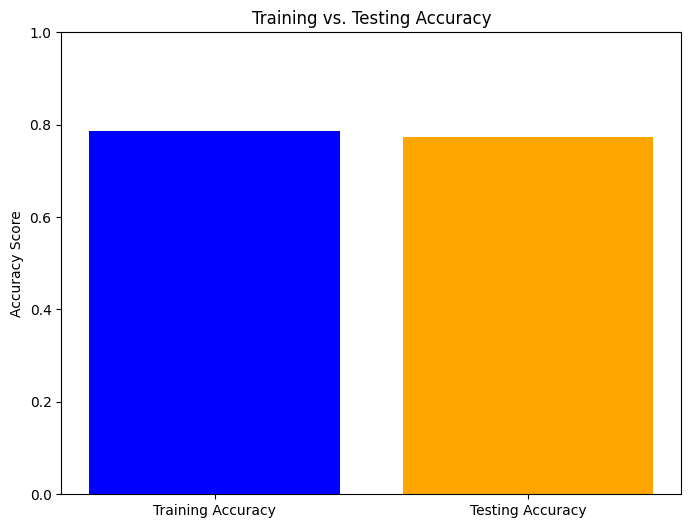

In [38]:
accuracies = [train_accuracy, test_accuracy]
labels = ['Training Accuracy', 'Testing Accuracy']

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)  # Accuracy range is from 0 to 1
plt.ylabel('Accuracy Score')
plt.title('Training vs. Testing Accuracy')
plt.show()

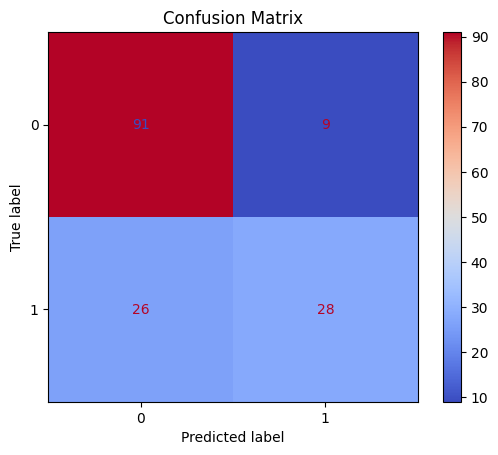

In [39]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction, labels=[0, 1])
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1])
disp.plot(cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()

In [40]:
#Now taking inputs from the user
input_data = (7,106,92,18,0,22.7,0.235,48)
numpy_array = np.asarray(input_data) #changing input array to numpy array

reshaped_input = numpy_array.reshape(1, -1) #reshaping the array as we are predicting for only 1 instance but model trained for 700+ values

#standardize the data
standard_input = scaler.transform(reshaped_input)

prediction = classifier.predict(standard_input)

if prediction[0] == 0:
    print("Pateint is Not Diabetic")
else:
    print("Patient is Diabetic")

Pateint is Not Diabetic


c:\Users\Nikunj_Rathore\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
import pickle

In [42]:
scaler_filename = 'diabetes_scaler.pkl'
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save the trained classifier (model) to a file
model_filename = 'diabetes_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(classifier, model_file)